### Install LAMINR (this might take a minute or two)

In [1]:
%%capture
!pip install "laminr[colab]"

### Import necessary modules and set the device

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from laminr import neuron_models, get_mei_dict, InvarianceManifold

# Check the device
reset_color = "\033[0m"
if torch.cuda.is_available():
    device = "cuda"
    color = "\033[92m"
    print(f"{color}You are using CUDA as device.{reset_color}")
else:
    device = "cpu"
    color = "\033[91m"
    print(f"{color}You are using CPU - things will be slow.{reset_color}")

You are using CUDA as device.


### Specify the input shape for both creating simulated neurons and optimized input

In [3]:
input_shape = [1, 100, 100]  # (channels, height, width)

Load the (pretrained or simulated) neurons model

In [4]:
model = neuron_models.simulated("demo1", img_res=input_shape[1:]).to(device)

### Generate MEIs (Maximally Exciting Inputs)

In [5]:
image_constraints = {
    "pixel_value_lower_bound": -1.0,
    "pixel_value_upper_bound": 1.0,
    "required_img_norm": 1.0,
}
meis_dict = get_mei_dict(model, input_shape, **image_constraints)

neuron_idx = 0: neuron number 0/3
Final f(x) = 1.00
neuron_idx = 1: neuron number 1/3
Final f(x) = 1.00
neuron_idx = 2: neuron number 2/3
Final f(x) = 1.00


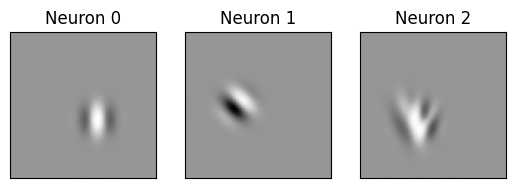

In [6]:
# plot the optimized MEIs
fig, axes = plt.subplots(1, len(meis_dict))
for ax, (neuron_idx, mei_dict) in zip(axes, meis_dict.items()):
    mei = mei_dict["mei"]
    vmax = np.abs(mei).max()
    vmin = -vmax
    ax.imshow(mei[0], vmin=vmin, vmax=vmax, cmap="Greys_r")
    ax.set(xticks=[], yticks=[], title=f"Neuron {neuron_idx}")

### Initialize and run the invariance manifold pipeline

In [7]:
inv_manifold = InvarianceManifold(model, meis_dict, **image_constraints)

In [ ]:
# Learn invariance manifold for neuron 0 (template)
template_idx = 0
template_imgs, template_activations = inv_manifold.learn(template_idx)

Act mean = 0.92 (min = 0.91 std = 0.00):   2%|▏         | 22/1000 [01:06<46:01,  2.82s/it]

In [ ]:
# Align the template to neurons 1 and 2
target_idxs = [1, 2]
aligned_imgs, aligned_activations = inv_manifold.match(target_idxs)

### Visualize the learned template

In [ ]:
gif = inv_manifold.save_learned_template_as_gif()
gif.show()

### Visualize the matched templates

In [ ]:
gif = inv_manifold.save_matched_template_as_gif(target_neuron_idx=1)
gif.show()

In [ ]:
gif = inv_manifold.save_matched_template_as_gif(target_neuron_idx=2)
gif.show()